# Hand Signs Digits Classification

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers as tfl

import h5py

%matplotlib inline
np.random.seed(1)

In [11]:
# load data
train_dataset = h5py.File('data/train_signs.h5', 'r')
X_train_orig = np.array(train_dataset['train_set_x'][:])
Y_train_orig = np.array(train_dataset['train_set_y'][:])

test_dataset = h5py.File('data/test_signs.h5', 'r')
X_test_orig = np.array(test_dataset['test_set_x'][:])
Y_test_orig = np.array(test_dataset['test_set_y'][:])

classes = np.array(test_dataset['list_classes'][:])

Y_train_orig = Y_train_orig.reshape((1, Y_train_orig.shape[0]))
Y_test_orig = Y_test_orig.reshape((1, Y_test_orig.shape[0]))

label = 2


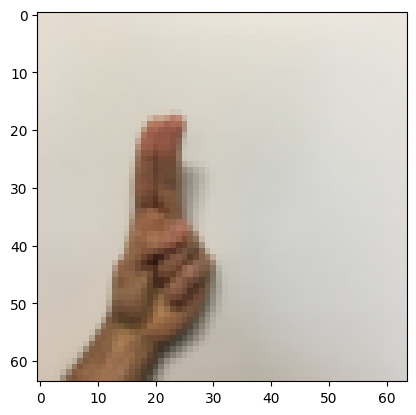

In [22]:
# show example
index = 10
plt.imshow(X_train_orig[index])
print('label = ' + str(np.squeeze(Y_train_orig[:, index])))

In [23]:
# normalize data
X_train = X_train_orig / 255.
X_test = X_test_orig / 255.
print(X_train.shape)
print(X_test.shape)

(1080, 64, 64, 3)
(120, 64, 64, 3)


In [42]:
Y_train = np.eye(6)[Y_train_orig.reshape(-1)]
Y_test = np.eye(6)[Y_test_orig.reshape(-1)]
print(Y_train.shape)
print(Y_test.shape)

(1080, 6)
(120, 6)


In [53]:
# build model
inputs = tfl.Input(shape=(64, 64, 3))
Z1 = tfl.Conv2D(filters=8, kernel_size=4, strides=1, padding='same')(inputs)
A1 = tfl.ReLU()(Z1)
P1 = tfl.MaxPool2D(pool_size=4, strides=4, padding='same')(A1)
Z2 = tfl.Conv2D(filters=16, kernel_size=2, strides=1, padding='same')(P1)
A2 = tfl.ReLU()(Z2)
P2 = tfl.MaxPool2D(pool_size=4, strides=4, padding='same')(A2)
F = tfl.Flatten()(P2)
outputs = tfl.Dense(units=6, activation='softmax')(F)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [54]:
# compile moel
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
# train model
history = model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/100


2023-09-10 16:35:30.935477: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 53084160 exceeds 10% of free system memory.


17/17 [==============================] - 2s 58ms/step - loss: 1.8151 - accuracy: 0.1370 - val_loss: 1.7970 - val_accuracy: 0.1333
Epoch 2/100
17/17 [==============================] - 1s 37ms/step - loss: 1.7938 - accuracy: 0.1630 - val_loss: 1.7860 - val_accuracy: 0.2583
Epoch 3/100
17/17 [==============================] - 1s 37ms/step - loss: 1.7868 - accuracy: 0.1954 - val_loss: 1.7809 - val_accuracy: 0.3083
Epoch 4/100
17/17 [==============================] - 1s 40ms/step - loss: 1.7790 - accuracy: 0.2361 - val_loss: 1.7731 - val_accuracy: 0.3417
Epoch 5/100
17/17 [==============================] - 1s 39ms/step - loss: 1.7691 - accuracy: 0.2546 - val_loss: 1.7582 - val_accuracy: 0.3667
Epoch 6/100
17/17 [==============================] - 1s 39ms/step - loss: 1.7468 - accuracy: 0.3306 - val_loss: 1.7362 - val_accuracy: 0.3750
Epoch 7/100
17/17 [==============================] - 1s 39ms/step - loss: 1.7192 - accuracy: 0.3148 - val_loss: 1.7011 - val_accuracy: 0.3500
Epoch 8/100
17/17 

In [57]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

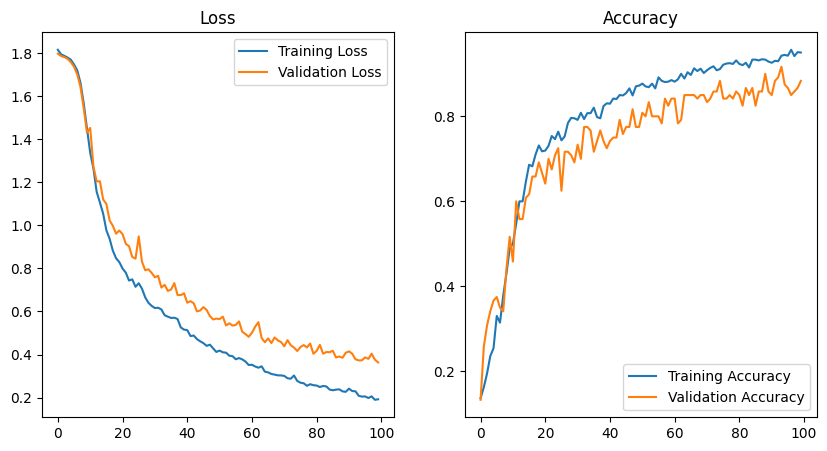

In [63]:
# plot loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Accuracy')
plt.show()

In [60]:
model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 9ms/step - loss: 0.3634 - accuracy: 0.8833


[0.36341744661331177, 0.8833333253860474]

From the plots above, we see that both loss and accuracy are doing well, we didn't reach the point where measures start to get worst for validation, and this is a sign that we need to train our model even more (more number of epochs or maybe train a larger model), so that we could overfit the training data and tune our parameters for the validation data.